In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings("ignore")

import os

font = FontProperties(fname='./Times New Roman.ttf')
plt.rcParams['font.family'] = font.get_family()

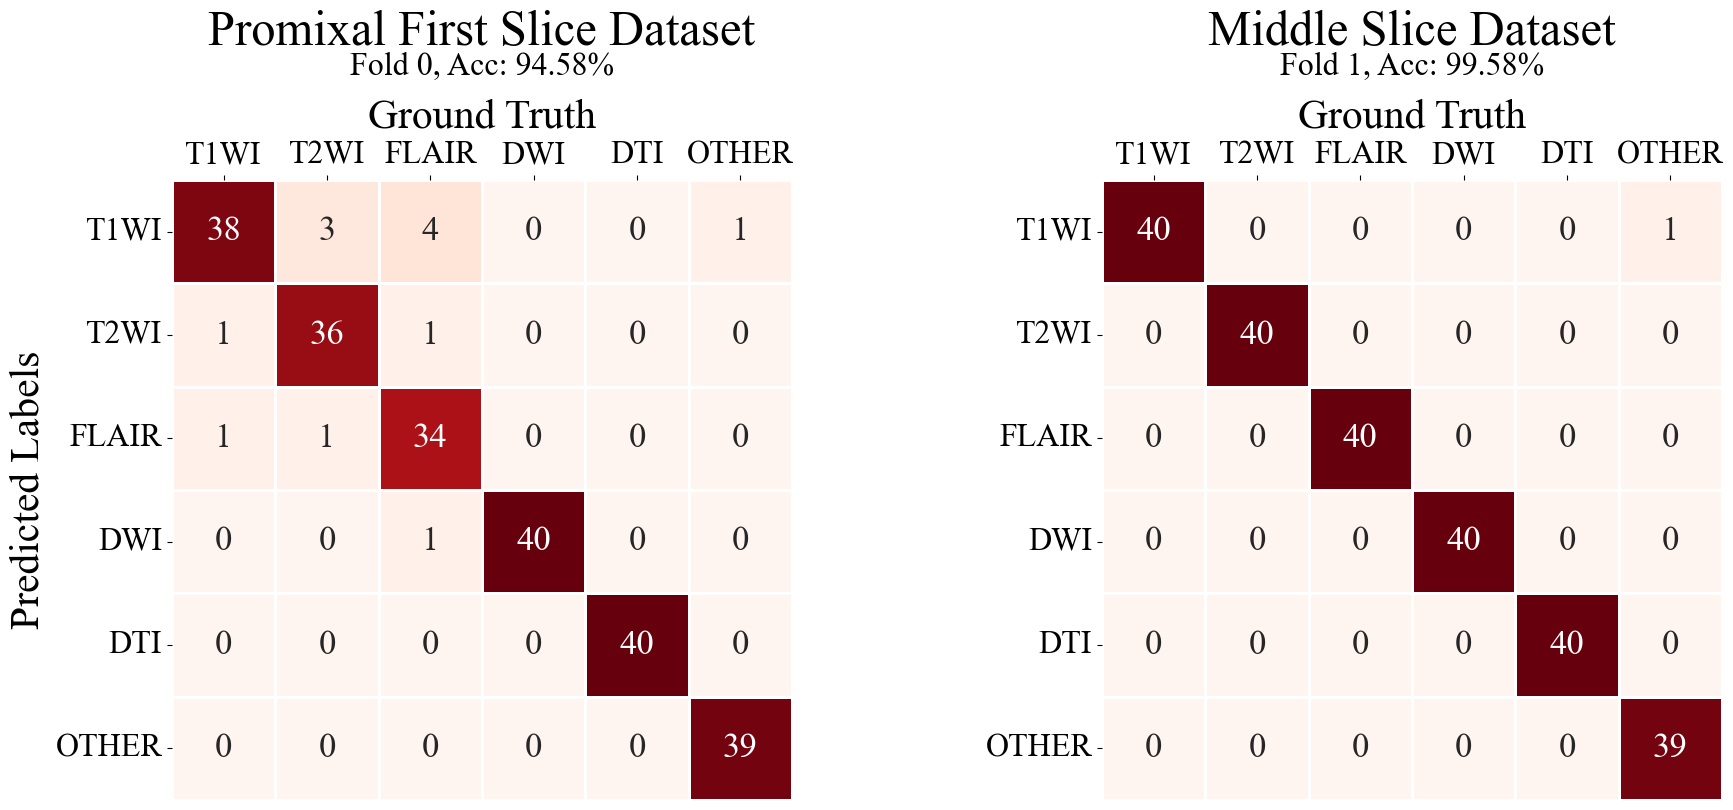

In [13]:
custom_order = ['T1WI', 'T2WI', 'FLAIR', 'DWI', 'DTI', 'OTHER']
output_dir = './slurm_output'

font_label = font.copy()
font_label.set_size(23)

fig, axes = plt.subplots(1, 2, figsize=(20, 13))

for i, promixal in enumerate(['first', 'middle']):
    ax = axes[i]
    file_path = os.path.join(output_dir, f'vote_{promixal}.out')

    with open(file_path, 'r') as file:
        lines = file.readlines()
        last_lines = lines[-1]

    actual_list = eval(last_lines)
    if promixal == 'first':
        num = 0
        name = 'Promixal First Slice Dataset'
    else:
        num = 1
        name = 'Middle Slice Dataset'
    ACC = actual_list[0][num]

    df = pd.read_csv(f'../output/vote/{promixal}/10-Fold-{num}.csv')
    cm = confusion_matrix(df['vote'], df['Ground Truth'], labels=range(len(custom_order)))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax, cbar=False,
        xticklabels=custom_order, yticklabels=custom_order,
        annot_kws={'fontproperties': font, 'size': 25},
        linewidths=1, square=True)
    
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, labelrotation=0)
    if i == 0:
        ax.set_ylabel('Predicted Labels', fontproperties=font, fontsize=30)
    ax.yaxis.set_label_coords(-0.2, 0.5)
    ax.text(0.5, 1.07, 'Ground Truth', transform=ax.transAxes, ha='center', va='bottom', 
            fontproperties=font, fontsize=30)
    ax.text(0.5, 1.2, f'{name}', transform=ax.transAxes, ha='center', va='bottom', 
            fontproperties=font, fontsize=35)
    ax.text(0.5, 1.16, f'Fold {num}, Acc: {round(ACC*100, 2)}%', transform=ax.transAxes, ha='center', va='bottom', 
                    fontproperties=font, fontsize=23)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_label)

fig.subplots_adjust(wspace=0.5)
plt.savefig('confusion_matrix.pdf', format='pdf')
plt.show()

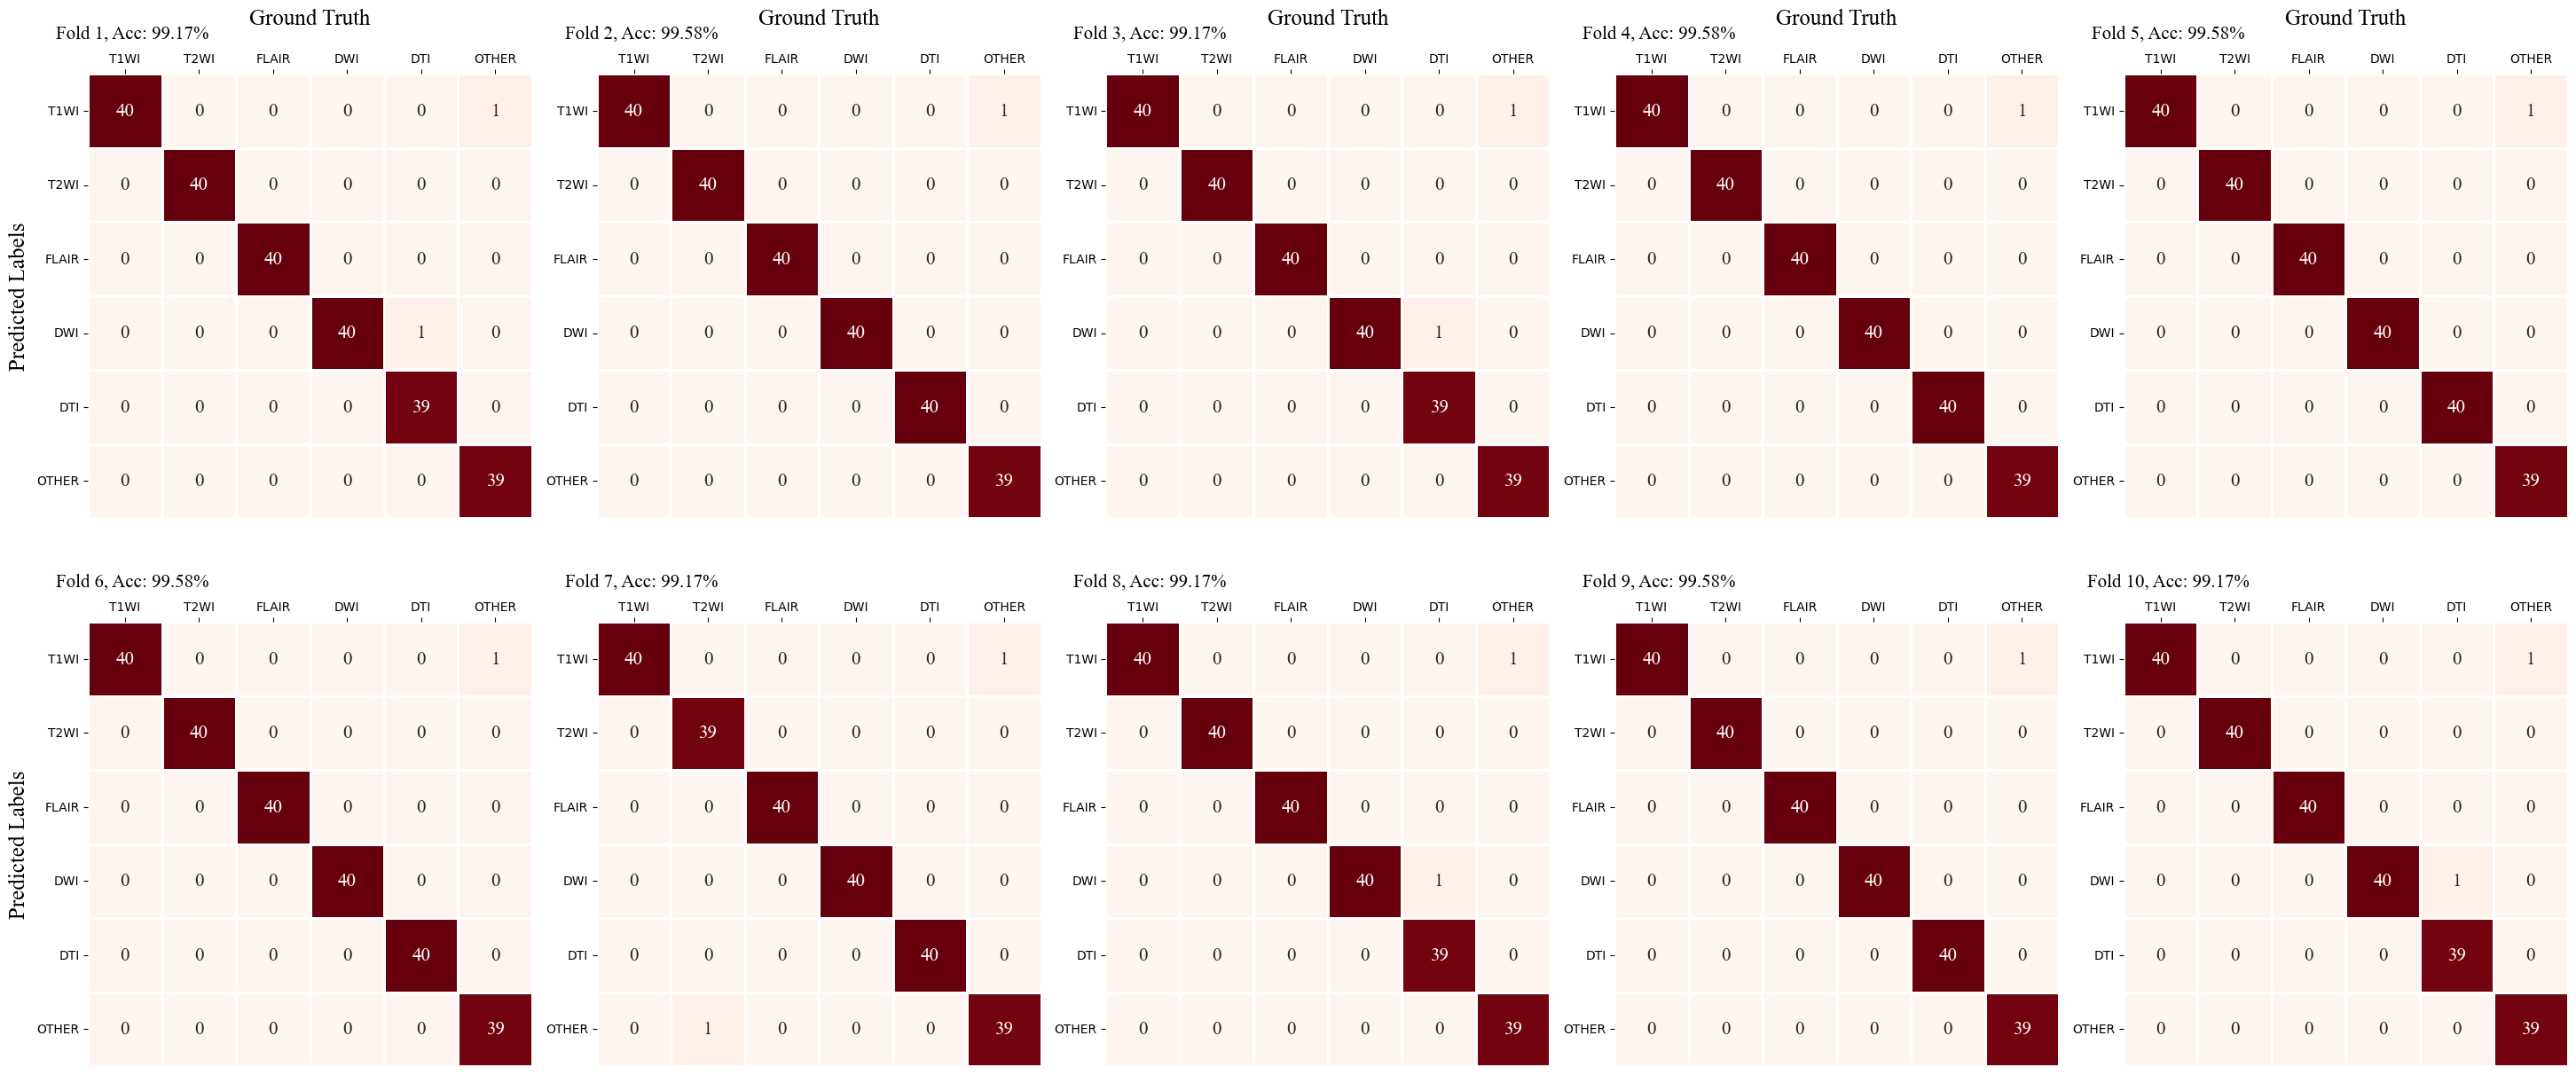

In [10]:
promixal = 'middle'

output_dir = './slurm_output'
file_path = os.path.join(output_dir, f'vote_{promixal}.out')

with open(file_path, 'r') as file:
    lines = file.readlines()
    last_lines = lines[-1]

actual_list = eval(last_lines)
fold10_res = actual_list[0]

custom_order = ['T1WI', 'T2WI', 'FLAIR', 'DWI', 'DTI', 'OTHER']

fig, axes = plt.subplots(2, 5, figsize=(29, 13))  # 两行五列

for i in range(10):
    df = pd.read_csv(f'../output/vote/{promixal}/10-Fold-{i}.csv')
    cm = confusion_matrix(df['vote'], df['Ground Truth'], labels=range(len(custom_order)))
    ax = axes[i // 5, i % 5]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax, cbar=False,
                xticklabels=custom_order, yticklabels=custom_order,
                annot_kws={'fontproperties': font, 'size': 15},
                linewidths=1, square=True)
    
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, labelrotation=0)

    if i % 5 == 0:
        ax.set_ylabel('Predicted Labels', fontproperties=font, fontsize=18)
        ax.yaxis.set_label_coords(-0.13, 0.5)
    else:
        ax.set_ylabel('')
        
    if i < 5: 
        ax.text(0.5, 1.1, 'Ground Truth', transform=ax.transAxes, ha='center', va='bottom', 
                fontproperties=font, fontsize=18)
    
    ax.text(0.1, 1.07, f'Fold {i+1}, Acc: {round(fold10_res[i]*100, 2)}%', transform=ax.transAxes, ha='center', va='bottom', 
                fontproperties=font, fontsize=15)

plt.tight_layout()

# plt.savefig('confusion_matrix.pdf', format='pdf')
plt.show()

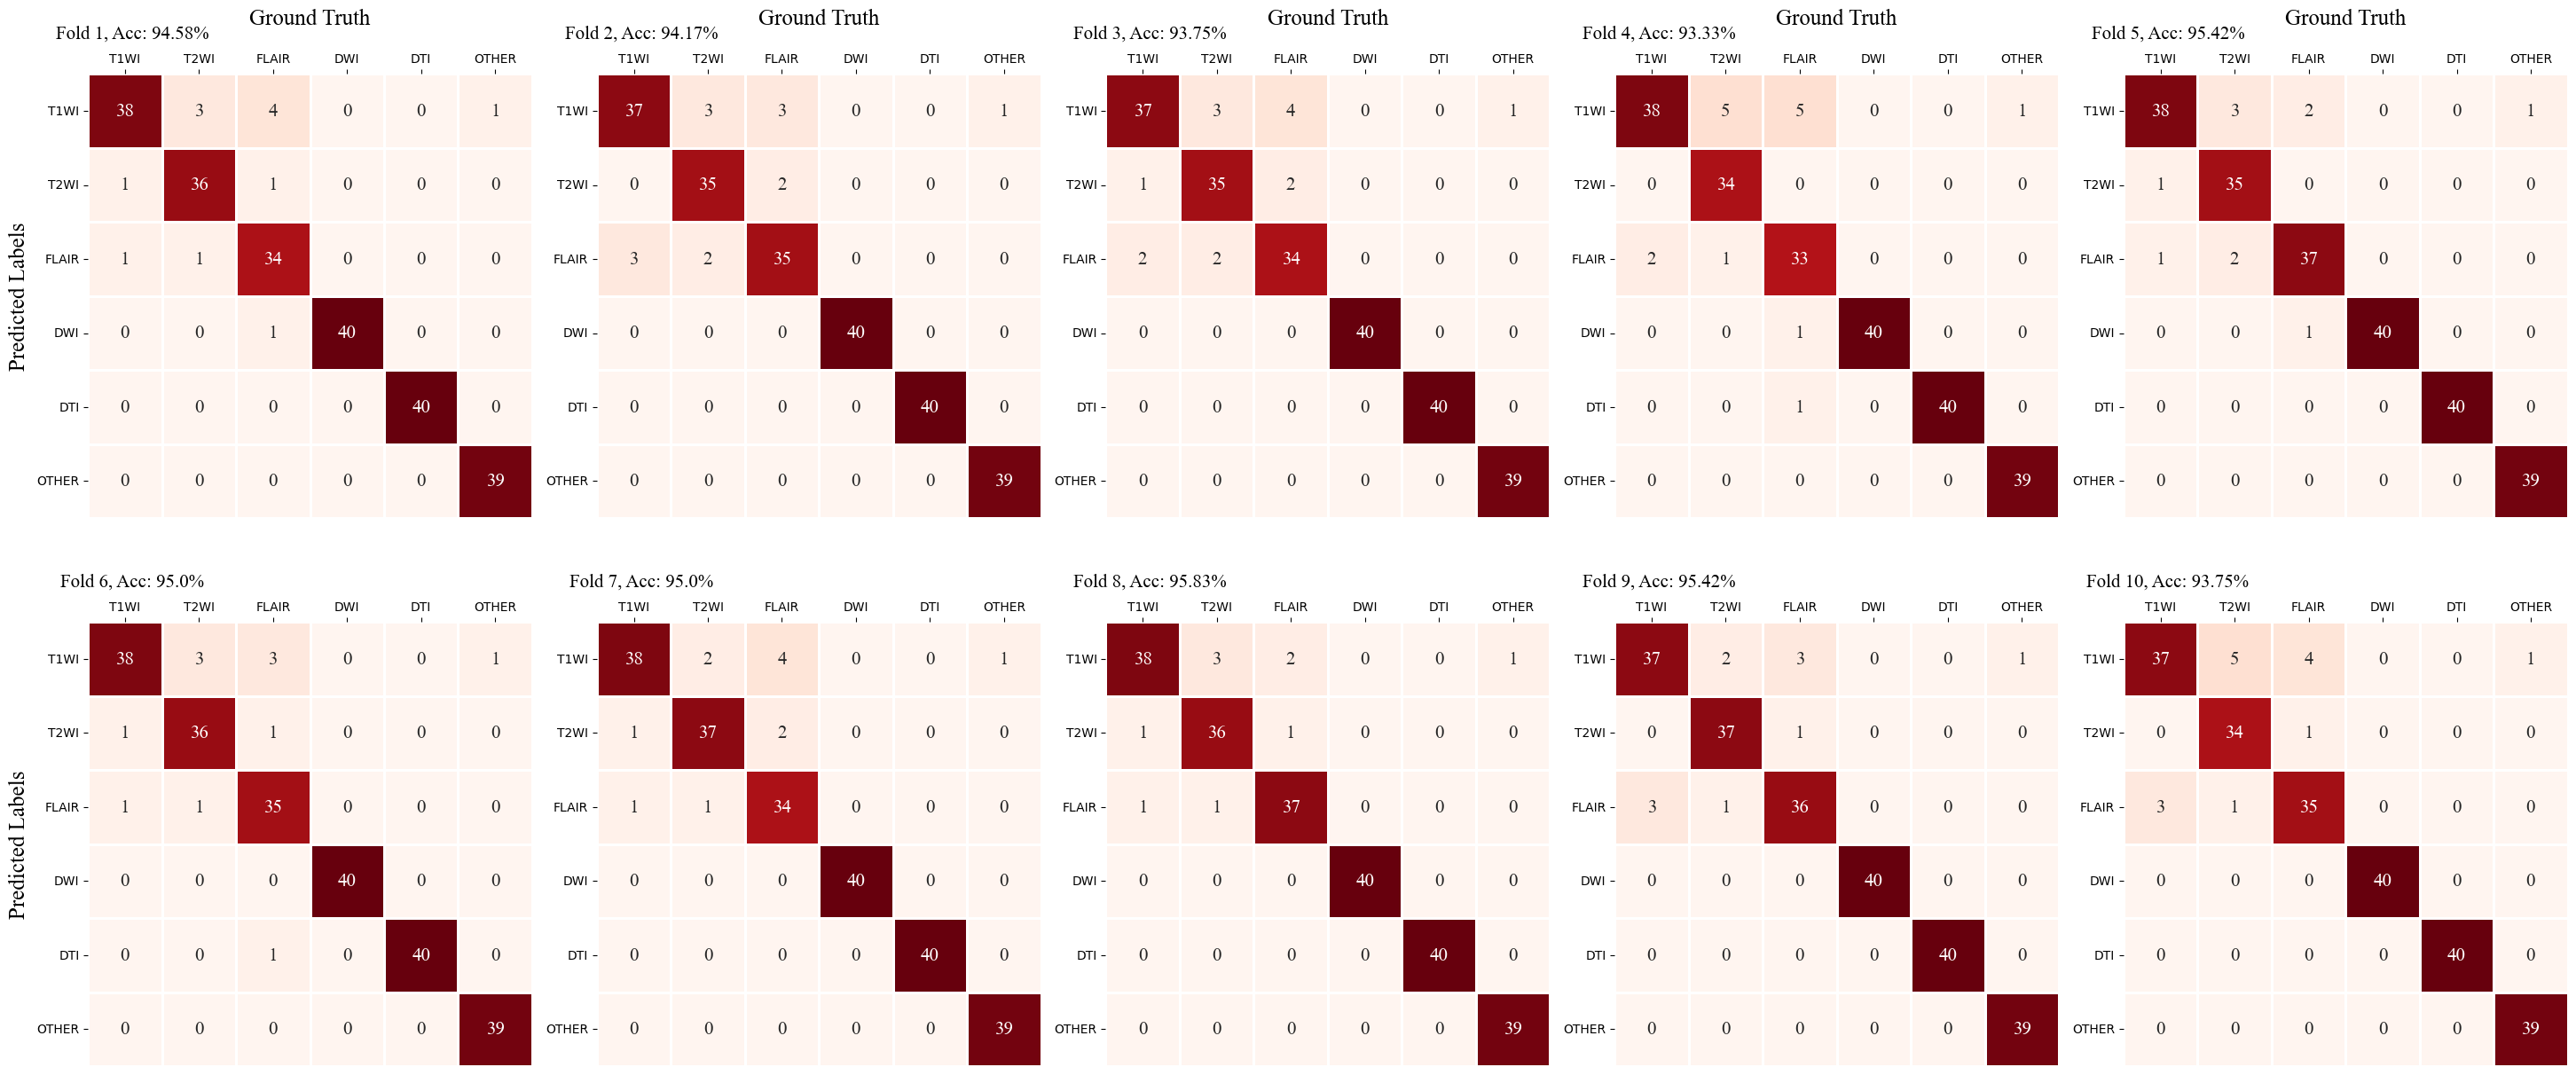

In [11]:
promixal = 'first'

output_dir = './slurm_output'
file_path = os.path.join(output_dir, f'vote_{promixal}.out')

with open(file_path, 'r') as file:
    lines = file.readlines()
    last_lines = lines[-1]

actual_list = eval(last_lines)
fold10_res = actual_list[0]

custom_order = ['T1WI', 'T2WI', 'FLAIR', 'DWI', 'DTI', 'OTHER']

fig, axes = plt.subplots(2, 5, figsize=(29, 13))  # 两行五列

for i in range(10):
    df = pd.read_csv(f'../output/vote/{promixal}/10-Fold-{i}.csv')
    cm = confusion_matrix(df['vote'], df['Ground Truth'], labels=range(len(custom_order)))
    
    ax = axes[i // 5, i % 5]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax, cbar=False,
                xticklabels=custom_order, yticklabels=custom_order,
                annot_kws={'fontproperties': font, 'size': 15},
                linewidths=1, square=True)

    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, labelrotation=0)

    if i % 5 == 0:
        ax.set_ylabel('Predicted Labels', fontproperties=font, fontsize=18)
        ax.yaxis.set_label_coords(-0.13, 0.5)
    else:
        ax.set_ylabel('')
        
    if i < 5: 
        ax.text(0.5, 1.1, 'Ground Truth', transform=ax.transAxes, ha='center', va='bottom', 
                fontproperties=font, fontsize=18)
    
    ax.text(0.1, 1.07, f'Fold {i+1}, Acc: {round(fold10_res[i]*100, 2)}%', transform=ax.transAxes, ha='center', va='bottom', 
                fontproperties=font, fontsize=15)

plt.tight_layout()

# plt.savefig('confusion_matrix.pdf', format='pdf')
plt.show()